<h1><center> Clustering + SVM: Can We Predict Purchases from Web Sites? </center></h1>
    
<h5><CENTER> ABDULLA MAMUN </CENTER></h5>

# Table of Contents
- Introduction
- Pre-Clustering Exploratory Data Analysis
- Pre-clustering Data Preparation
- Cluster Modeling
- Post-Clustering Exploratory Data Analysis
- Clustering output versus actual labels
- SVM Modeling
- Model selection
- Conclusions
- References

# Introduction

Most online retailers are prolific users of data science methods for a variety of purposes, including fraud detection, personalized marketing, price optimization, upselling, and inventory management. Of particular interest to most online retailers is whether or not a site visitor ends up executing a purchase while engaged with the web site.

Web sites are capable of capturing a wide variety of metrics any time someone accesses one of their web pages, including the recording of the ID of the specific web page visited, the ID's of any items the user either hovered over or clicked on, the elapsed time spent by the user on the page, etc. Online retailers often use such data to try to determine whether or not a given site visitor will actually make a purchase. 

For this Project, I will be working with a data set comprised of a variety of such web site metrics.

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

The data set we will be using is sourced from a Kaggle contribution: [DATA] https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). 

A __data dictionary__ for the dataset is provided below.

|Attribute                |Description          |
|-------------------------|---------------------|
|Administrative           |number of administrative pages visited by the user|
|Administrative Duration  |total time spent on administrative pages by the user|
|Informational            |number of informational pages visited by the user|
|Informational Duration   |total time spent on informational pages by the user|
|Product Related          |number of pages related to products visited by the user|
|Product Related Duration |total time spent on pages related to products by the user|
|Bounce Rate              |the percentage of visitors who enter the site and then leave without viewing other pages.|
|Exit Rate                |percentage of page views that end on a particular page|
|Page Value              |the average value for a web page that a user visited before completing an e-commerce transaction|
|Special Day             |indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day,                             Valentine's Day) in which the sessions are more likely to be finalized with transaction.|
|Month                   |the month when the interaction occurred|
|Operating System        |the operating system used by the visitor|
|Browser                 |Browser used by the visitor|
|Region                  |the region of the visitor|
|Traffic type            |the type of traffic source|
|Weekend               |Binary variable indicating whether the visit occurred on a weekend (1 for weekend, 0 for weekdays)|
|Revenue               |Binary variable indicating whether the visit resulted in revenue generation (1 for yes, 0 for no)|





The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.


## Project Goal

The objective for Project 2 is to use clustering algorithms to create groupings of similar data observations within the provided data set, apply labels to the data observations assigned to those groupings, and then, after completing the necessary EDA and data prep work, construct an SVM model to predict the most likely categorization of any previously unseen data items. After constructing and evaluating our models, we will identify our preferred model and apply it to a testing data set to assess its performance.

## Methodology

- Import the necessary python libraries.
- Load the data into Github Repository and then upload that data into python Jupyter Notebook using Pandas reader function.
- Read the data and their information like number of observations, features, data type, individual features missing values, punctuation, and other anomalies inside each feature.
- Visualize the statistical description of each features, creating Univariate, Bivariate, Multivariate analysis, dealing with missing values, duplicate values, outliers, collinearity, feature selection, standardization, model building and compare model performance among models by performance metrics.

In [1]:
%matplotlib inline

## Data Loading & Manipulation
Data is being loaded directly from the GitHub source link to the Jupyter notebook using the Pandas read CSV reader function. To load the data, it is also necessary to import necessary libraries like Pandas. To visualize the data insights, import visualization libraries like Matplotlib, Seaborn, and Plotly.

After loading the data, we will observe some characteristics of the data. For example, we will see the dimensions of the dataset, feature types, etc.

Import the useful libraries for this project data analysis and model building purpose.


In [2]:
# Importing libraries 
import numpy as np
import pandas as pd

# Import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import missingno as msno

from sklearn.preprocessing import Normalizer
from scipy.stats import zscore

from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import imblearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score, recall_score, accuracy_score

# Import necessary libraries
from yellowbrick.cluster.silhouette import SilhouetteVisualizer


# Import filterwarnngs  from warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Sets the default figure size to 10 inches in width and 6 inches in height
plt.rcParams['figure.figsize'] = [10, 6] 

In [3]:
# Import github link for data source
source_url = 'https://raw.githubusercontent.com/mamun21616/DAV-6150/main/Project2_Data.csv'
        
# Load the data in a variable name customer_df which means customer dataframe
user_df = pd.read_csv(source_url)

# Show the first five rows of the dataset
user_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               4                     37.5              2   
3               4                    115.7              0   
4               1                     60.0              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               8               222.000000   
1                     0.0              14              1037.500000   
2                    82.0               4                96.625000   
3                     0.0              16               655.383333   
4                    15.0              26               670.166667   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.028571   53.474571         0.0   May                 1   
1     0.014286   0.047619    0.000000         0.0   Mar                 2   
2     0.000000   0.017500    0.000000         0.0   Nov                 2   
3     0.000000   0.012037    0.000000         0.0   Nov                 1   
4     0.000000   0.003846    0.000000         0.0   May                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  
0        1       1            2        New_Visitor     True  
1        2       4            2  Returning_Visitor    False  
2        2       9            2        New_Visitor    False  
3        1       2            3  Returning_Visitor    False  
4        2       3            4  Returning_Visitor    False

# Pre-Clustering Exploratory Data Analysis
Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. In this EDA process start with Univariate analysis, bivariate analysis and multivariate analysis.

Now we will present the Descriptive Statistics for each variable.

In [4]:
# Display the dataset total attributes and observations
user_df.shape

(12330, 17)

The total number of observations are 12330 and attributes are 17.

In [5]:
# Show the details about the dataset information
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Dataset observation:

- This is a type of Pandas Dataframe.

- Index ranges from 0-12329.

- Total number of attributes are 17.

- Majority of the attributes showing  numerical data type. Only one of them is categorical and one is boolean..

- Dataset used computer memory 1.5+ MB.

In [6]:
# Check the data types for each variable
user_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

In [7]:
#Find the number of unique values for each variable
user_df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
dtype: int64

We notice that some variables only have a few values such as 2 for Weekend, 3 for VistorType, 6 for SpecialDay, 8 for OperatingSystmes, and 9 for Region.

In [8]:
# Display descriptive statistics for all columns, including object and categorical types
user_df.describe(include='all')

Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                     NaN             NaN                      NaN   
top                        NaN             NaN                      NaN   
freq                       NaN             NaN                      NaN   
mean                 34.472398       31.731468              1194.746220   
std                 140.749294       44.475503              1913.669288   
min                   0.000000        0.000000                 0.000000   
25%                   0.000000        7.000000               184.137500   
50%                   0.000000       18.000000               598.936905   
75%                   0.000000       38.000000              1464.157214   
max                2549.375000      705.000000             63973.522230   

         BounceRates     ExitRates    PageValues    SpecialDay  Month  \
count   12330.000000  12330.000000  12330.000000  12330.000000  12330   
unique           NaN           NaN           NaN           NaN     10   
top              NaN           NaN           NaN           NaN    May   
freq             NaN           NaN           NaN           NaN   3364   
mean        0.022191      0.043073      5.889258      0.061427    NaN   
std         0.048488      0.048597     18.568437      0.198917    NaN   
min         0.000000      0.000000      0.000000      0.000000    NaN   
25%         0.000000      0.014286      0.000000      0.000000    NaN   
50%         0.003112      0.025156      0.000000      0.000000    NaN   
75%         0.016813      0.050000      0.000000      0.000000    NaN   
max         0.200000      0.200000    361.763742      1.000000    NaN   

        OperatingSystems       Browser        Region   TrafficType  \
count       12330.000000  12330.000000  12330.000000  12330.000000   
unique               NaN           NaN           NaN           NaN   
top                  NaN           NaN           NaN           NaN   
freq                 NaN           NaN           NaN           NaN   
mean            2.124006      2.357097      3.147364      4.069586   
std             0.911325      1.717277      2.401591      4.025169   
min             1.000000      1.000000      1.000000      1.000000   
25%             2.000000      2.000000      1.000000      2.000000   
50%             2.000000      2.000000      3.000000      2.000000   
75%             3.000000      2.000000      4.000000      4.000000   
max             8.000000     13.000000      9.000000     20.000000   

              VisitorType Weekend  
count               12330   12330  
unique                  3       2  
top     Returning_Visitor   False  
freq                10551    9462  
mean                  NaN     NaN  
std                   NaN     NaN  
min                   NaN     NaN  
25%                   NaN     NaN  
50%                   NaN     NaN  
75%                   NaN     NaN  
max                   NaN     NaN

__Observations:__

The count shows that there are 12,330 observations for each variable, suggesting no missing values and The unique values provide information on the diversity of data in categorical variables.

The "top" values indicate the __most frequently__ occurring value in each categorical variable and The "freq" values represent the frequency of the most common value in each categorical variable.

For example, the "BounceRates" and "ExitRates" have relatively low mean values, indicating that, on average, the bounce and exit rates are low.
The "ProductRelated_Duration" variable has a wide range, as indicated by the high standard deviation and maximum value.

"May" is the most frequent month. "Returning_Visitor" is the most common visitor type. "False" is the dominant value for the "Weekend" variable.

Outliers may be present in variables with a large standard deviation or a wide range between the 75th percentile and the maximum value.

The "SpecialDay" variable has a mean of 0.061427, indicating a relatively low special day impact on average.

It's essential to further explore the data, visualize distributions, and consider domain knowledge to gain a comprehensive understanding. Additionally, addressing any potential outliers or missing values may enhance the reliability of our analysis. 

## Check the duplicate values

In [9]:
# Find duplicate rows in the DataFrame based on all columns
duplicates =user_df[user_df.duplicated()]

# Display duplicate rows
duplicates

Administrative  Administrative_Duration  Informational  \
92                  0                      0.0              0   
975                 0                      0.0              0   
2006                0                      0.0              0   
2174                0                      0.0              0   
2221                0                      0.0              0   
...               ...                      ...            ...   
12121               0                      0.0              0   
12164               0                      0.0              0   
12170               0                      0.0              0   
12276               0                      0.0              0   
12304               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
92                        0.0               1                      0.0   
975                       0.0               2                      0.0   
2006                      0.0               1                      0.0   
2174                      0.0               1                      0.0   
2221                      0.0               1                      0.0   
...                       ...             ...                      ...   
12121                     0.0               1                      0.0   
12164                     0.0               1                      0.0   
12170                     0.0               1                      0.0   
12276                     0.0               1                      0.0   
12304                     0.0               1                      0.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
92             0.2        0.2         0.0         0.0   Nov                 2   
975            0.2        0.2         0.0         0.0   Mar                 1   
2006           0.2        0.2         0.0         0.0   Dec                 2   
2174           0.2        0.2         0.0         0.0   Nov                 1   
2221           0.2        0.2         0.0         0.0   Nov                 2   
...            ...        ...         ...         ...   ...               ...   
12121          0.2        0.2         0.0         0.0  June                 3   
12164          0.2        0.2         0.0         0.0   Dec                 2   
12170          0.2        0.2         0.0         0.0   Mar                 2   
12276          0.2        0.2         0.0         0.0   Nov                 1   
12304          0.2        0.2         0.0         0.0   Mar                 2   

       Browser  Region  TrafficType        VisitorType  Weekend  
92           2       1            1  Returning_Visitor    False  
975          1       1            1  Returning_Visitor    False  
2006         2       8            1  Returning_Visitor    False  
2174         1       4            1  Returning_Visitor    False  
2221         2       1            1  Returning_Visitor    False  
...        ...     ...          ...                ...      ...  
12121        2       3           13  Returning_Visitor    False  
12164        2       1            3  Returning_Visitor    False  
12170        2       2            1  Returning_Visitor    False  
12276        1       3            3  Returning_Visitor    False  
12304        2       4            1  Returning_Visitor    False  

[125 rows x 17 columns]

There are 125 rows that have identical values in all columns with some previous row. This is not too big, only 1% of our entire dataset.
We want to keep the first occurrence of each duplicated row and drop the subsequent ones.


## Identify null values

In [10]:
# Check for missing values
user_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

There is no null values in our dataset.

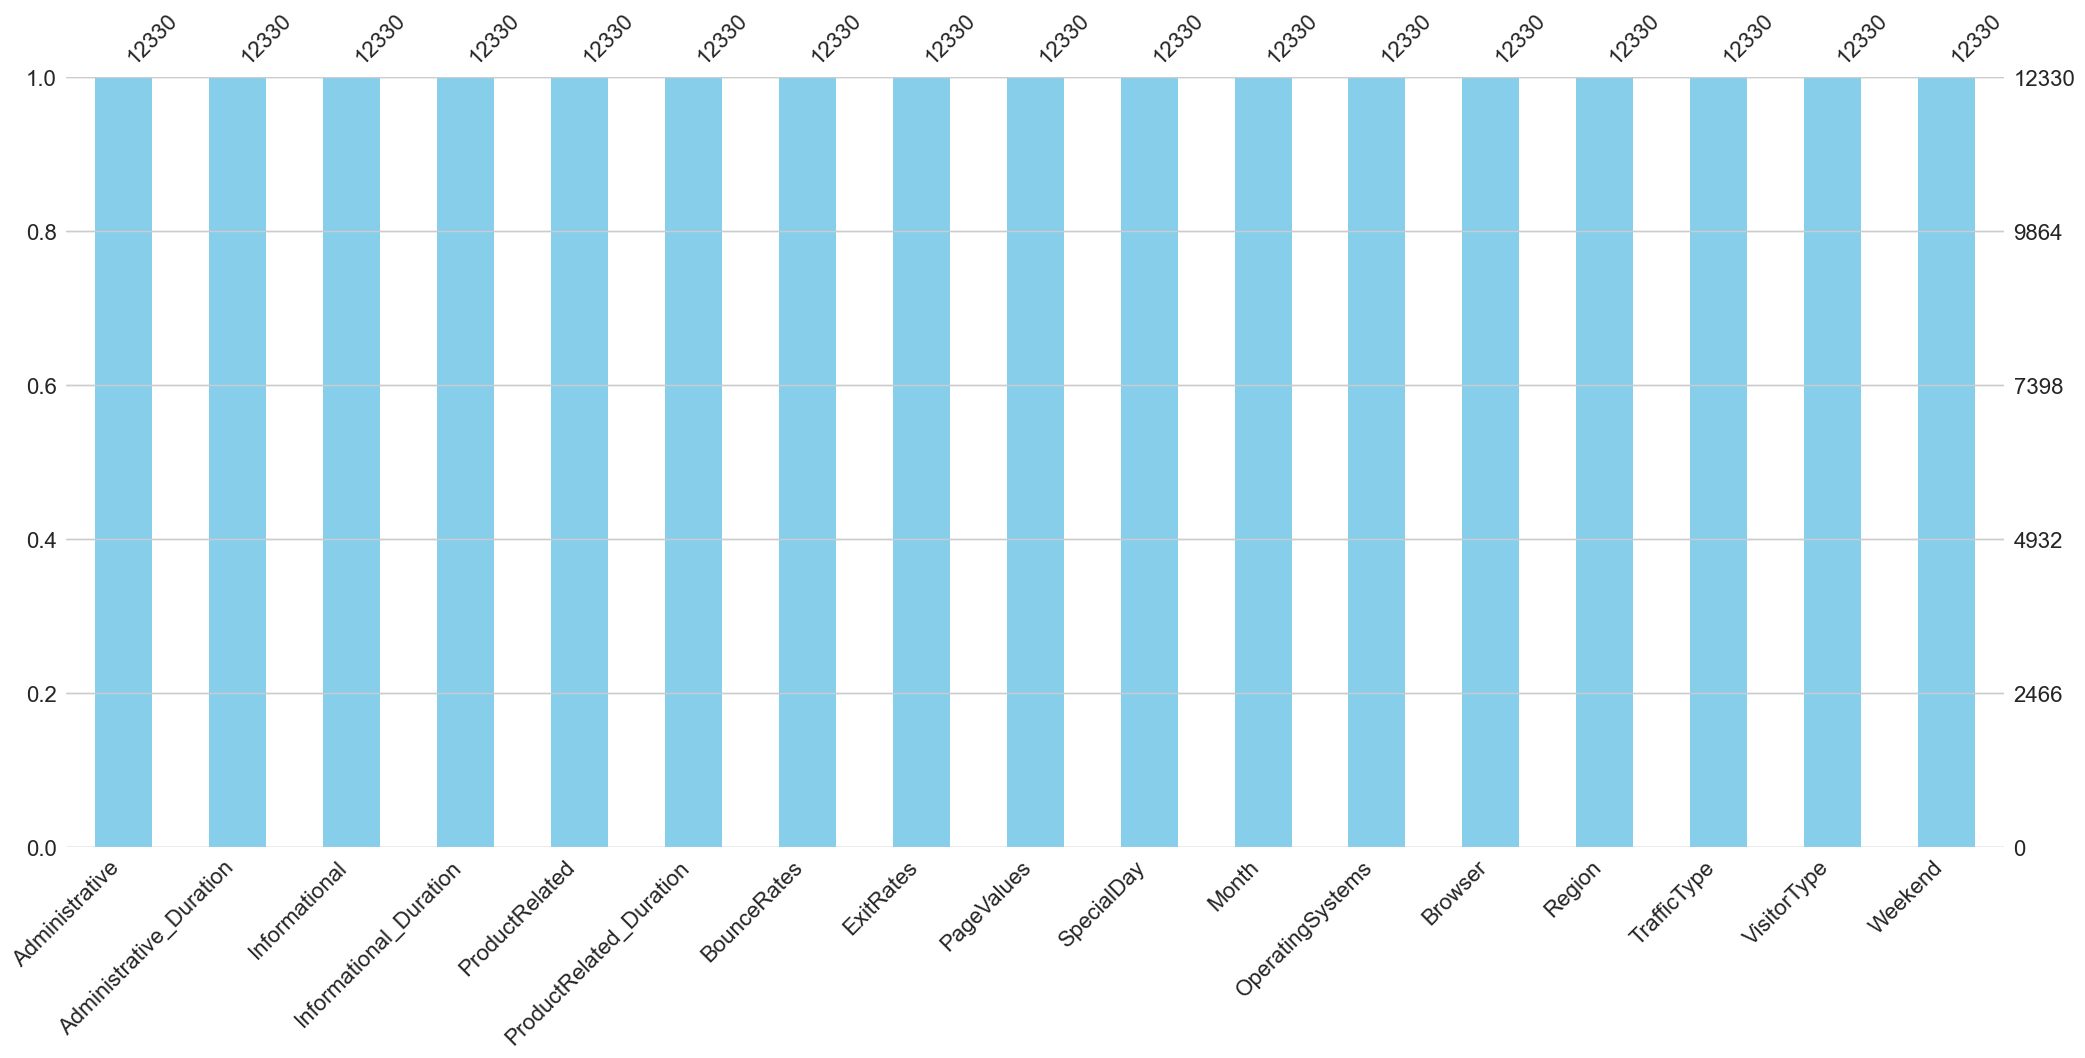

In [11]:
# Create a bar chart visualization of missing values
msno.bar(user_df, color='skyblue')

# Display the plot
plt.show();

__Replace the Weekend attribute True/False values with 1/0.__

In [12]:
#Change the data type to int
user_df['Weekend'] = user_df.Weekend.astype(int)

#Replace True/False with 1/0
user_df = user_df.replace(to_replace = ['True','False'],value = [1,0])

#View the data frame to ensure the changes were made
user_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               4                     37.5              2   
3               4                    115.7              0   
4               1                     60.0              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               8               222.000000   
1                     0.0              14              1037.500000   
2                    82.0               4                96.625000   
3                     0.0              16               655.383333   
4                    15.0              26               670.166667   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.028571   53.474571         0.0   May                 1   
1     0.014286   0.047619    0.000000         0.0   Mar                 2   
2     0.000000   0.017500    0.000000         0.0   Nov                 2   
3     0.000000   0.012037    0.000000         0.0   Nov                 1   
4     0.000000   0.003846    0.000000         0.0   May                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  
0        1       1            2        New_Visitor        1  
1        2       4            2  Returning_Visitor        0  
2        2       9            2        New_Visitor        0  
3        1       2            3  Returning_Visitor        0  
4        2       3            4  Returning_Visitor        0

Next, let's look at the numeric attributes and categorical attributes more closely.

In [13]:
#Create lists of numerical and categorical attributes

col_cat=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

col_num=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
         'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numerical attributes:%s" %len(col_num))

# of categorical attributes:7
# of numerical attributes:10


__Plot a histogram for each of our numerical attributes.__

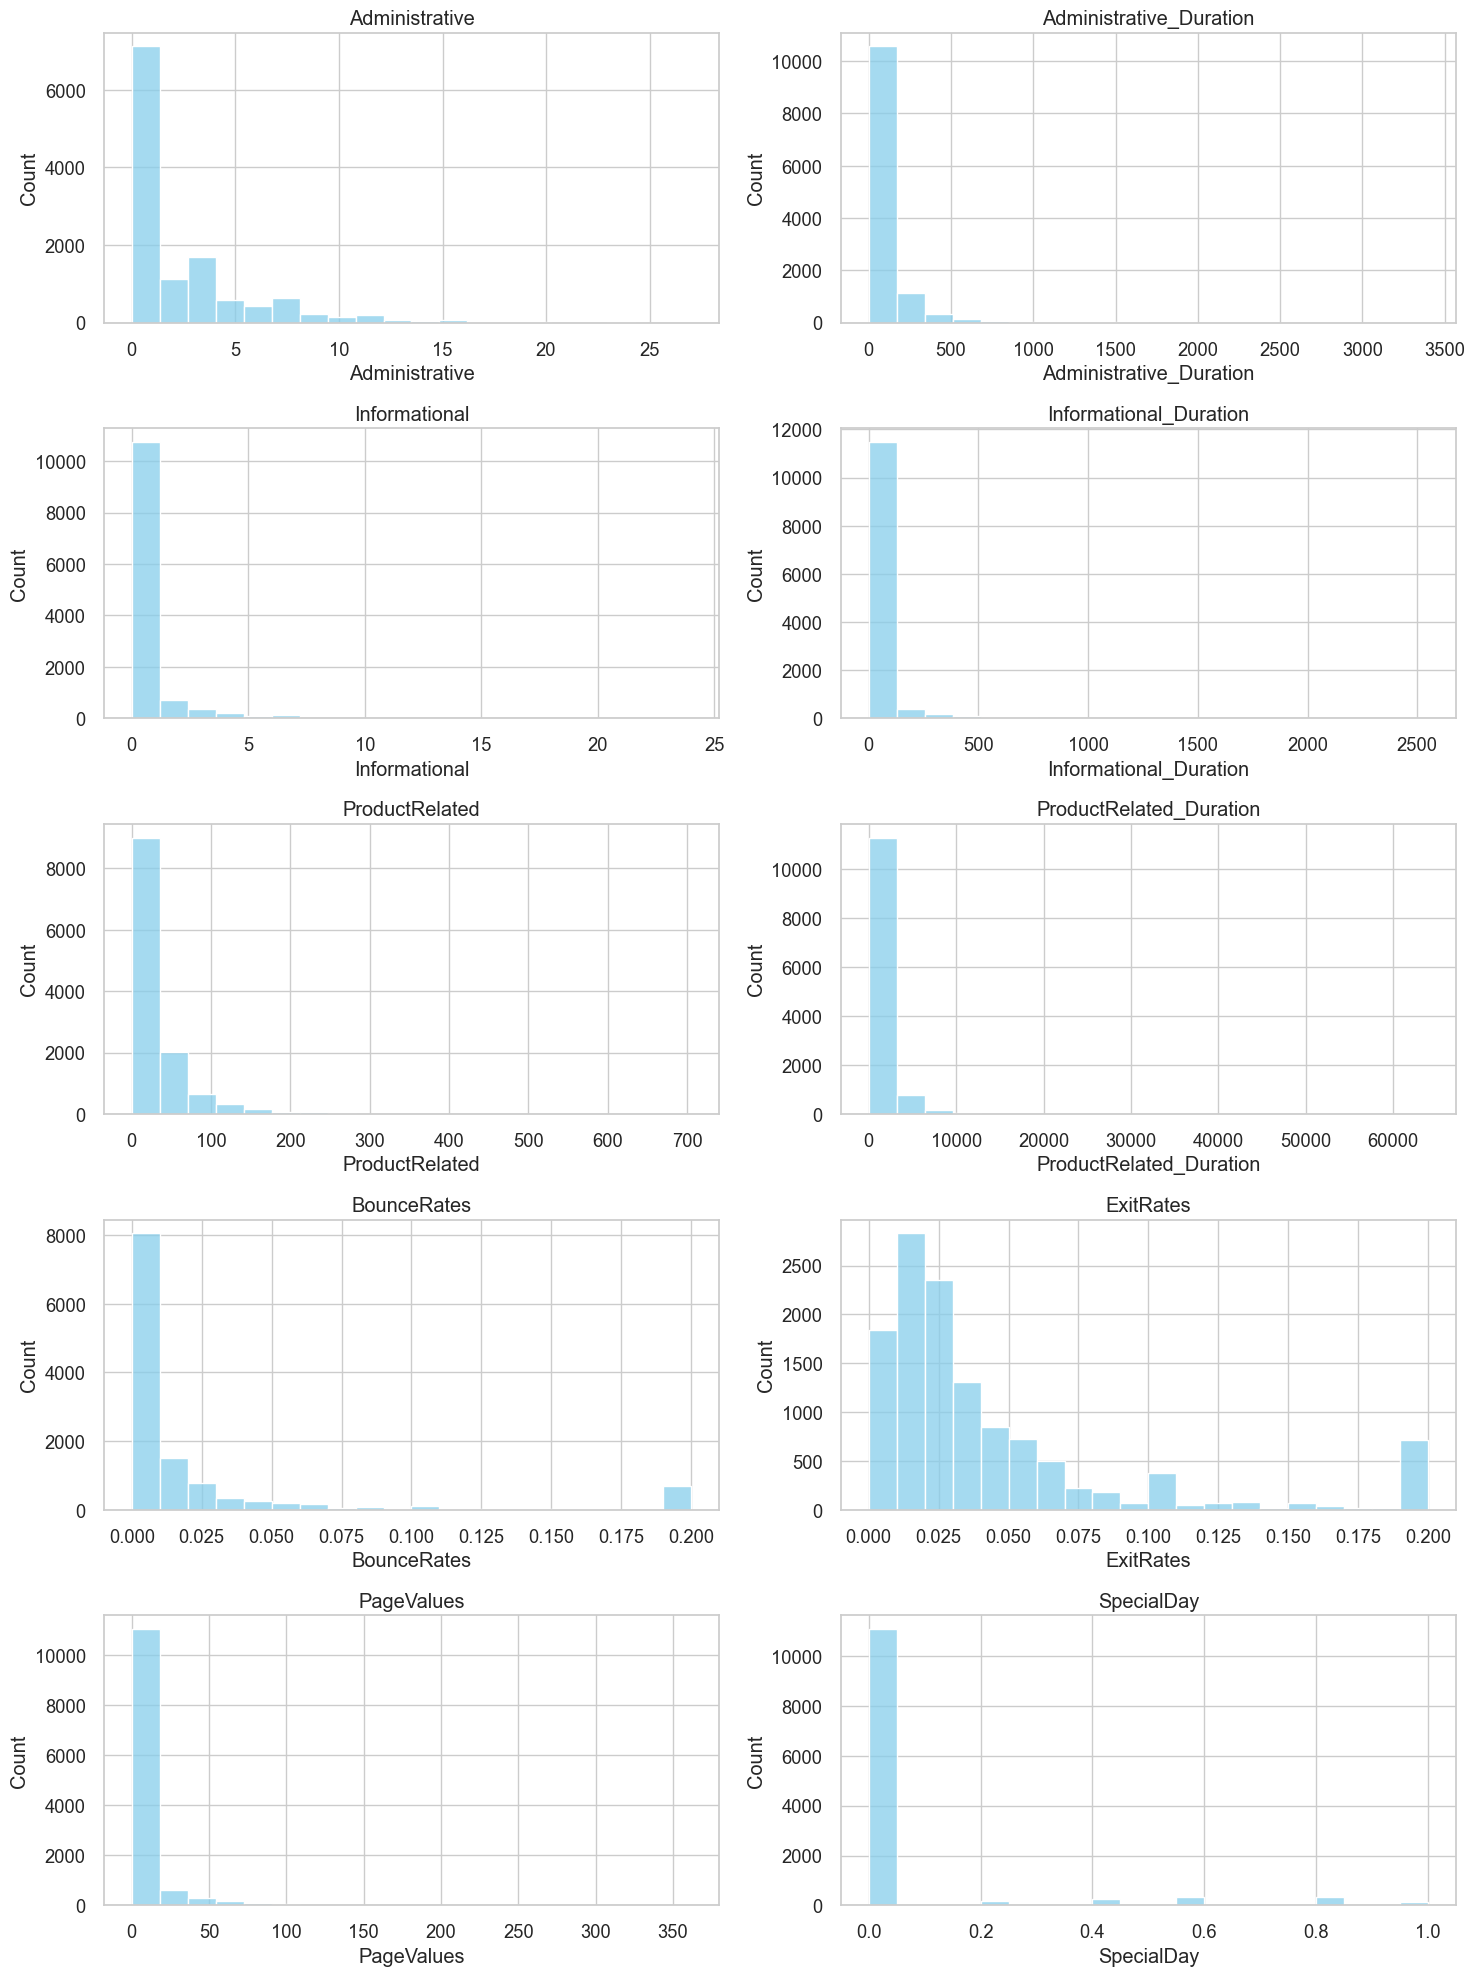

In [14]:
# Set plot parameters for Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Define number of columns for subplots
num_cols = 2

# Calculate number of rows needed for subplots
num_rows = len(col_num) // num_cols + (len(col_num) % num_cols > 0)

# Create subplots using Seaborn
plt.figure(figsize=(15, 20))

# Iterate through each numerical column
for i, k in enumerate(col_num, 1):
    # Create a subplot
    plt.subplot(num_rows, num_cols, i)
    
    # Create a histogram plot using Seaborn for the current numerical column
    sns.histplot(user_df[k], kde=False, bins=20, color='skyblue')
    
    # Set title for the subplot
    plt.title(k)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


The histograms are right-skewed.

Administrative has 27 unique values with a mode of 0, a median of 1, and a mean of 2.32.
Administrative_Duration has 3,335 unique values with a mode of 0, a median of 7.5, and a mean of 80.82.
Informational has 17 unique values with a mode of 0, a median of 0, and a mean of 0.5.
Informational_Duration has 1,258 unique values with a mode of 0, a median of 0, and a mean of 34.47.
ProductRelated has 311 unique values with a mode of 1, a median of 18, and a mean of 31.73.
ProductRelated_Duration has 9,551 unique values with a mode of 0, a median of 598.94, and a mean of 1.194.75.
BounceRates has 1,872 unique values with a mode of 0, a median of 0, and a mean of 0.02.
ExitRates has 4,777 unique values with a mode of 0.2, a median of 0.03, and a mean of 0.04.
PageValues has 2,704 unique values with a mode of 0, a median of 0, and a mean of 5.89.
SpecialDay has 6 unique values with a mode of 0, a median of 0, and a mean of 0.06.

__Check the boxplots for outliers.__

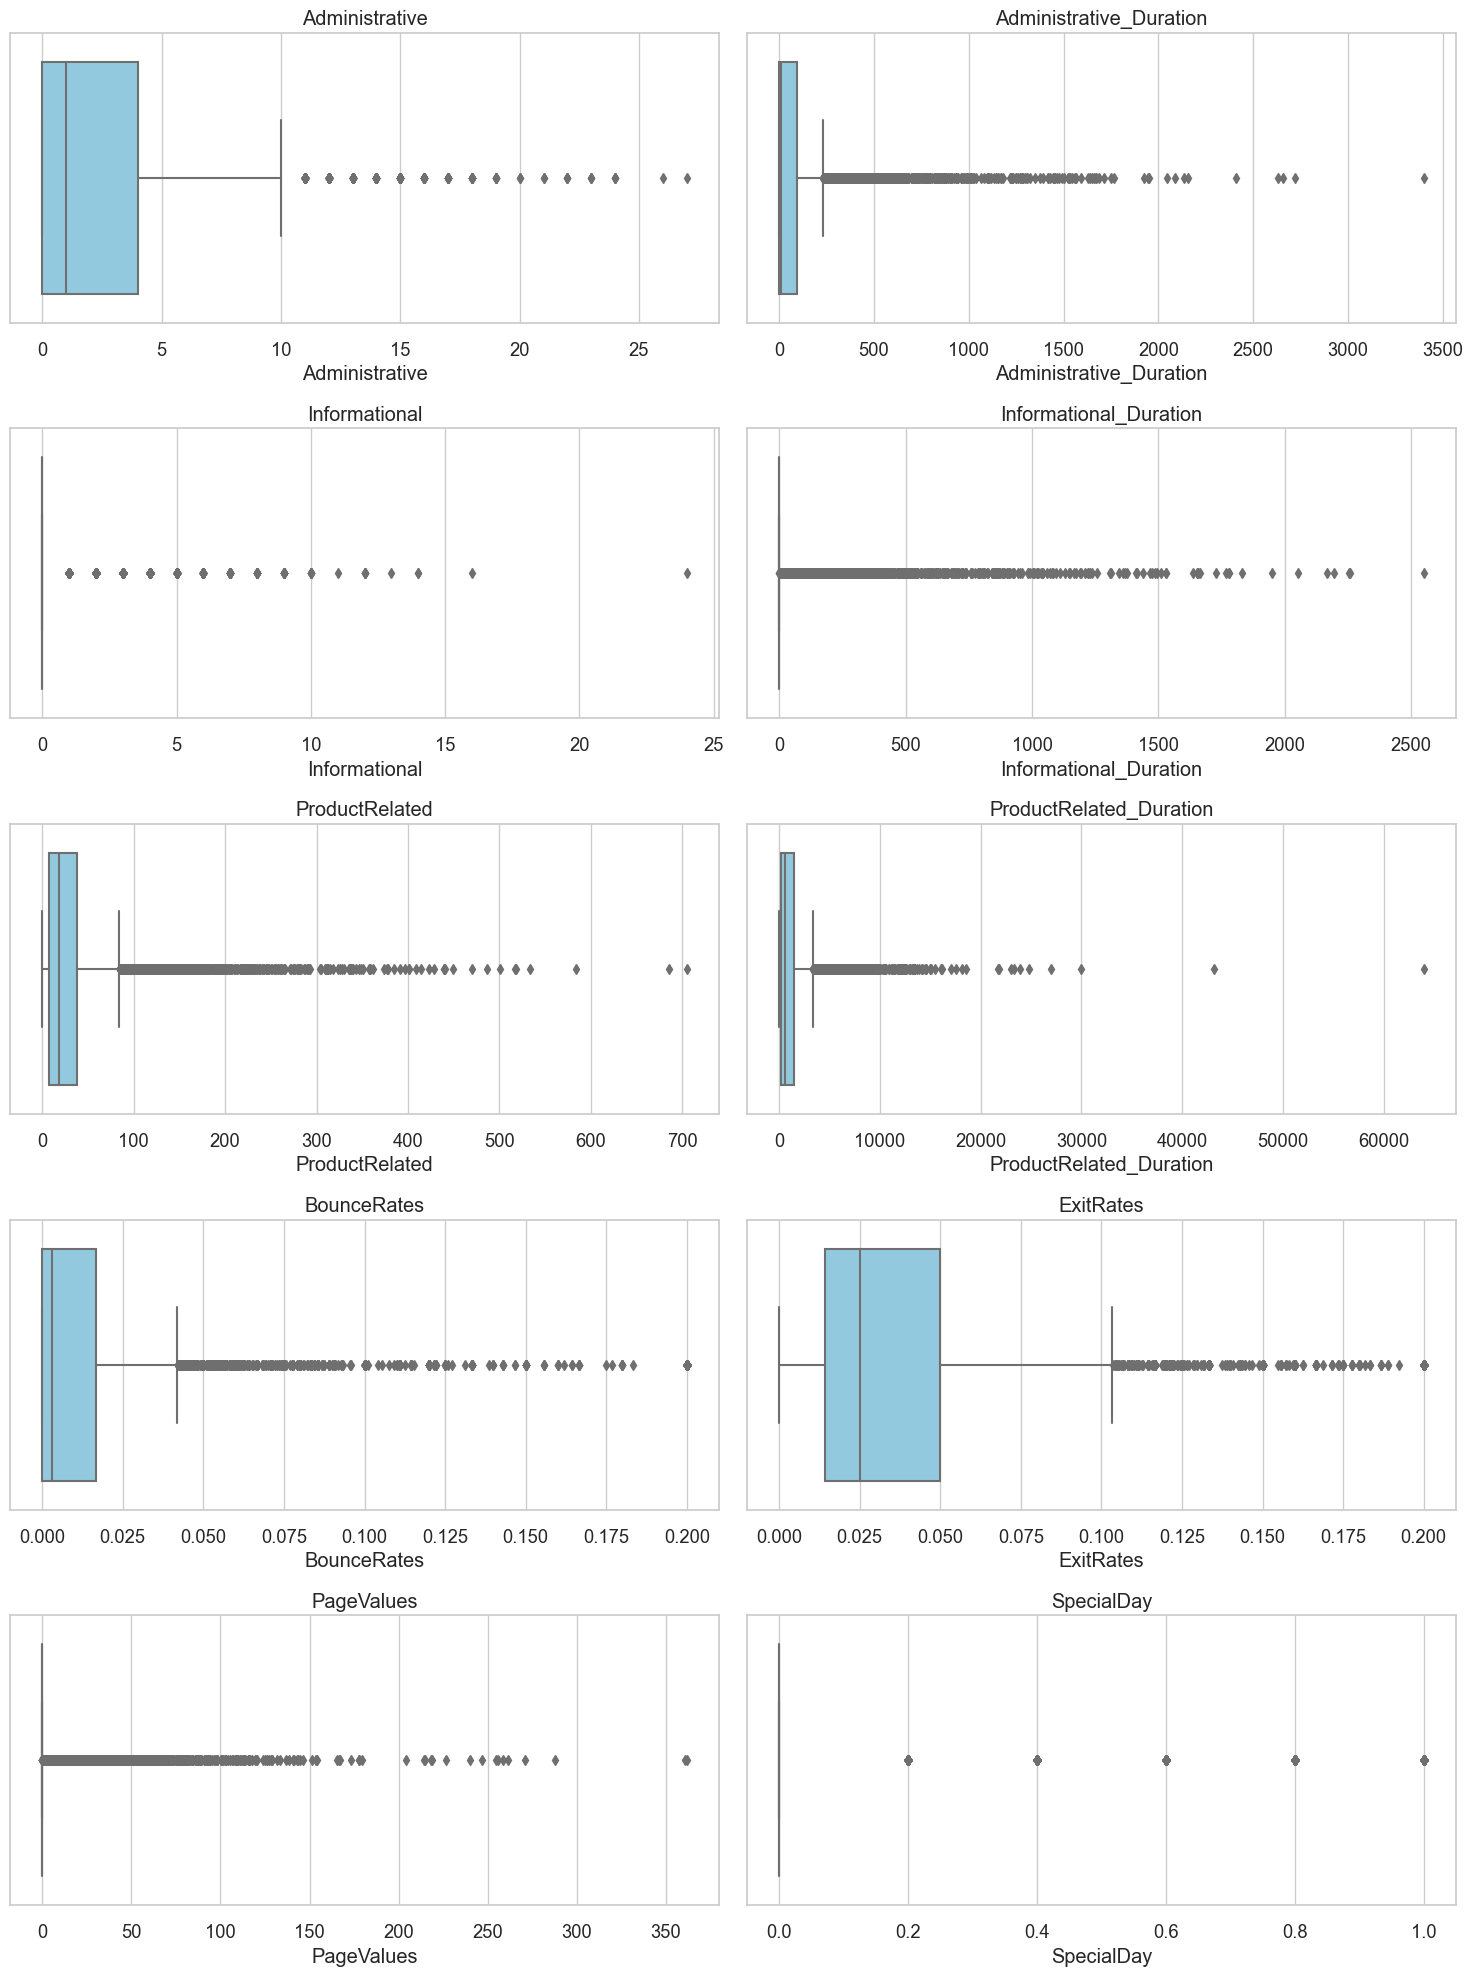

In [15]:
# Create subplots using Seaborn with box plots

# Set the figure size
plt.figure(figsize=(15, 20))

# Iterate through each numerical column
for i, k in enumerate(col_num, 1):
    # Create a subplot
    plt.subplot(num_rows, num_cols, i)
    
    # Create a box plot using Seaborn for the current numerical column
    sns.boxplot(x=user_df[k], color='skyblue')
    
    # Set title for the subplot
    plt.title(k)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


- Administrative's median value is 1. Q1 to Q3 is 0 - 4 with outliers from 11 to 27.
- Administrative_Duration's median value is 7.5. Q1 to Q3 is 0 - 93 with outliers from 94 to 3398.75.
- Informational's median value is 0. Q1 to Q3 is 0 with outliers from 1 to 24.
- Informational_Duration's median value is 0. Q1 to Q3 is 0 with outliers from 1 to 2549.375.
- ProductRelated's median value is 18. Q1 to Q3 is 7 - 38 with outliers from about 80 to 705.
- ProductRelated_Duration's median value is 598.93. Q1 to Q3 is 184.08 to 1464.26 with outliers from about 4,000 to 63,973.52.
- BounceRates's median value is 0.0031. Q1 to Q3 is 0 to 0.017 with outliers from 0.04 to 0.2.
- ExitRates's median value is 0.25. Q1 to Q3 is 0.014 to 0.05 with outliers from 0.105 to 0.2.
- PageValues's median value is 0. Q1 to Q3 is 0 with outliers from 0.04 to 361.76.
- SpecialDay's median value is 0. Q1 to Q3 is 0 with outliers from 0.2 to 1.

__Plot a bar chart for each of the categorical attributes.__

In [16]:
# Set plot parameters
fig = make_subplots(rows=len(col_cat), cols=1, subplot_titles=col_cat)

# Use an index to identify the spot of the subplot
j = 1

# For each categorical column
for k in col_cat:
    # Create bar plot trace for the subplot
    trace = go.Bar(x=user_df[k].value_counts().index, y=user_df[k].value_counts().values, name=k)
    
    # Add the trace to the subplot
    fig.add_trace(trace, row=j, col=1)
    
    # Update layout for the subplot
    fig.update_xaxes(title_text=k, row=j, col=1)
    
    # Increment index for the next subplot
    j += 1

# Update layout for the entire subplot
fig.update_layout(title_text='Bar Plots for Categorical Columns', showlegend=False, height=len(col_cat)*300)

# Show results
fig.show();

- The most common observations for Month is May with 27%, Novemeber with 24%, March with 15%, and December with 14%. The other months, October, September, August, July, June, and February have between 1% and 4%. There are no values for January or April.
- The most common observations for OperatingSystems is 2 with 54%, 1 with 21%, 3 with 21%, and 4 with 4%. Other OperatingSystems, 5 - 8, are about 1% each.
- The most common observations for Browser is 2 with 65%, 1 with 20%, 4 with 6% and 5 with 4%. The other browsers, 3, 6, 7, 8, 9, 10, 11, 12 and 13, have between 0.01% and 1%.
- The most common observations for Region is 1 with 39%, 3 with 19%, 4 with 10%, and 2 with 9. The other regions, 5, 6, 7, 8, and 9, have between 3% and 7%.
- The most common observations for TrafficType are 2 with 32%, 1 with 20%, 3 with 17% and 4 with 9%. The other traffic types, 5-20, have between 0.01% and 6%
- The most common observation for VisitorType is 86% for returning vistors. New visitors was 14% and other was almost 1%.
- The most common observation for Weekend was the 0 indicator with 77%. The 1 indicator had 23%.

__Check the correlation matrix to see if any of the numeric values are highly correlated.__

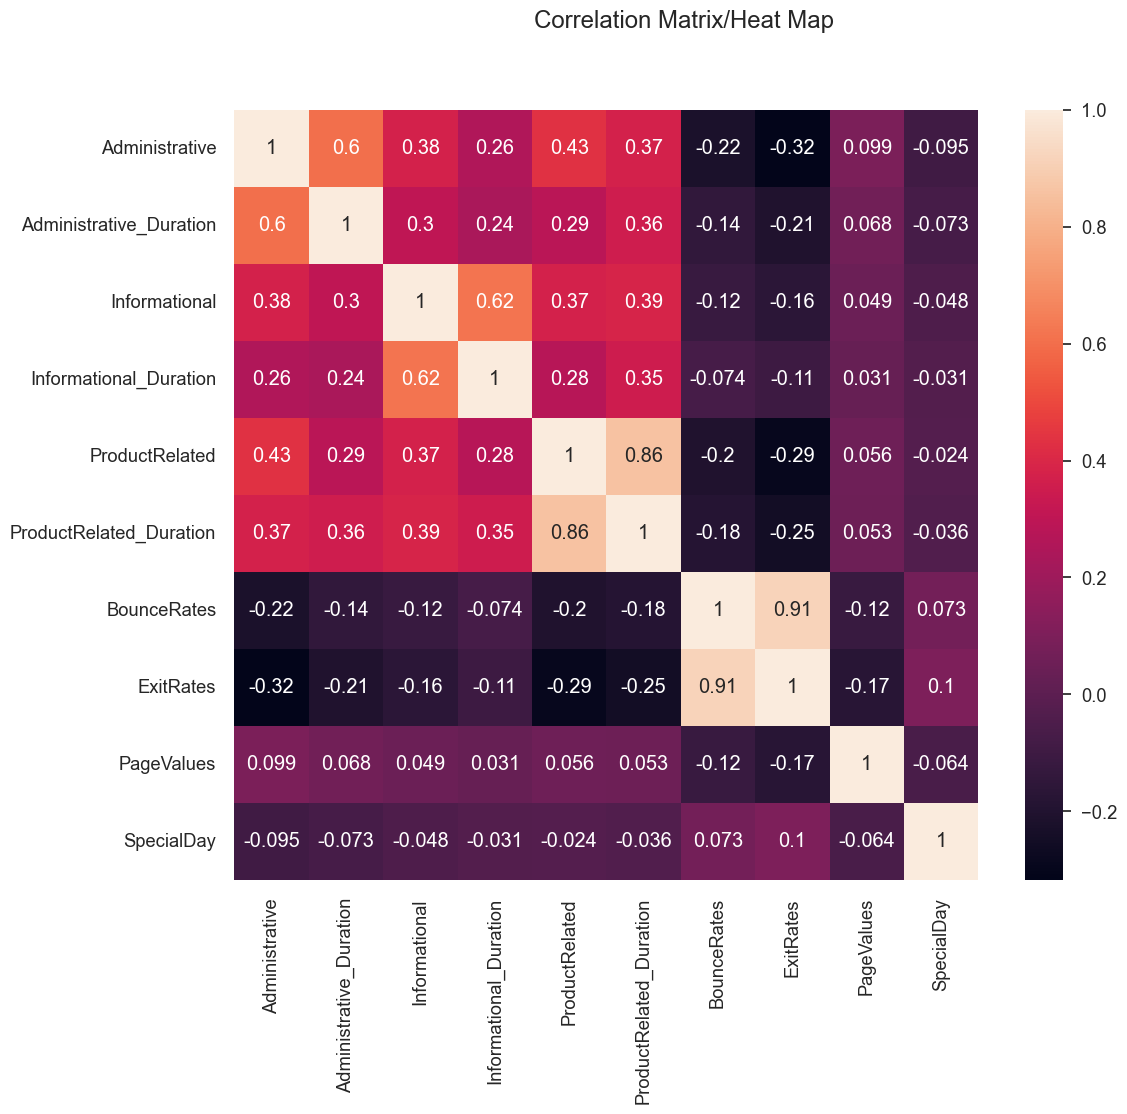

In [17]:
#Graph heat map for correlation
corr_num=user_df[col_num].corr()
fig = plt.figure(figsize=(12, 10))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show();

__Observation:__

- BounceRates and ExitRates are highly correlated at 0.91.
- ProductRelated and ProductRelated_Duration are highly correlated at 0.86.

__VIF: Variance inflation factor__
It helps a formal detection-tolerance for multicollinearity. VIF of 5 or 10 and above (depends on the business problem) indicates a multicollinearity problem.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_ = add_constant(user_df)

In [19]:
# Identify non-numeric columns
non_numeric_columns = X_.select_dtypes(exclude=['number']).columns

# Exclude non-numeric columns
numeric_X = X_.drop(columns=non_numeric_columns)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_X.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_X.values, i) for i in range(numeric_X.shape[1])]

# Display the VIF for each variable
print(vif_data)


                   Variable        VIF
0                     const  13.036429
1            Administrative   1.943617
2   Administrative_Duration   1.690702
3             Informational   1.830830
4    Informational_Duration   1.678422
5            ProductRelated   4.394648
6   ProductRelated_Duration   4.328707
7               BounceRates   6.355282
8                 ExitRates   6.951509
9                PageValues   1.048127
10               SpecialDay   1.023717
11         OperatingSystems   1.087743
12                  Browser   1.071774
13                   Region   1.016389
14              TrafficType   1.053564
15                  Weekend   1.007468


- The const variable (which might be a constant term added to the model) has a VIF of 13.12, indicating potential multicollinearity issues.

- The variables BounceRates and ExitRates have relatively high VIF values (5.67 and 6.21, respectively), suggesting that they might be highly correlated with other predictors in the model.

- Other variables have VIF values close to 1 or within an acceptable range, indicating lower levels of multicollinearity.

# Pre-clustering Data Preparation

In Data Preparation we will, care about filling missing values, handling outliers and remove duplicate values. 

__Remove Duplicates__

In [20]:
# Remove exact duplicates
user_df.drop_duplicates(keep = 'first', inplace=True)

In [21]:
# Display the number of observations remain after removing the duplicates
len(user_df)

12205

In [22]:
# Check agian if there is any duplicate rows exist yet or not
len(user_df[user_df.duplicated()])


0

Observation: We now have checked and verified that there are no more duplicate values as the result from the check shows zero duplicates.

__Handle Outliers__

Since we have addressed the missing values and the transformation, we now proceed to handle outliers. We shall use Z_score methods to handle outliers.

In [23]:
# Calculate Z-scores for each column 
z_scores = np.abs(zscore(user_df[col_num]))

# Set a threshold for outlier detection (e.g., z_score_threshold = 3)
z_score_threshold = 3
outliers = (z_scores > z_score_threshold).any(axis=1)

# Remove outliers from the DataFrame
user_df = user_df[~outliers]

For selecting our Z-Score threshold as 3, I followed a general guideline that considers data points as outliers if they have a Z-Score less than -3 or greater than +3. This guideline is based on the empirical rule in statistics, which states that for a normal distribution, about 68% of the data falls within one standard deviation of the mean. About 95% falls within two standard deviations, about 99.7% within three standard deviations.

__Drop numeric attributes that are strongly correlated with other attributes.__

In [24]:
#Drop ProductRelated_Duration and BounceRate
user_df = user_df.drop(user_df.columns[[5, 6]], axis=1)
              
#View the data frame to ensure that the columns were removed
user_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               4                     37.5              2   
3               4                    115.7              0   
4               1                     60.0              1   

   Informational_Duration  ProductRelated  ExitRates  PageValues  SpecialDay  \
0                     0.0               8   0.028571   53.474571         0.0   
1                     0.0              14   0.047619    0.000000         0.0   
2                    82.0               4   0.017500    0.000000         0.0   
3                     0.0              16   0.012037    0.000000         0.0   
4                    15.0              26   0.003846    0.000000         0.0   

  Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  \
0   May                 1        1       1            2        New_Visitor   
1   Mar                 2        2       4            2  Returning_Visitor   
2   Nov                 2        2       9            2        New_Visitor   
3   Nov                 1        1       2            3  Returning_Visitor   
4   May                 2        2       3            4  Returning_Visitor   

   Weekend  
0        1  
1        0  
2        0  
3        0  
4        0

__Create dummy variables for the categorical variables month, operating system, browser, region, traffic type and visitor type.__

In [25]:
#Create dummy variables for categorical variables
user_df1 = pd.get_dummies(user_df,columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'],
drop_first=False)

In [26]:
user_df1

Administrative  Administrative_Duration  Informational  \
0                   0                     0.00              0   
1                   0                     0.00              0   
2                   4                    37.50              2   
3                   4                   115.70              0   
4                   1                    60.00              1   
...               ...                      ...            ...   
12324               0                     0.00              0   
12325               3                   148.00              0   
12326               1                     9.00              1   
12327               0                     0.00              0   
12329               1                    73.75              0   

       Informational_Duration  ProductRelated  ExitRates  PageValues  \
0                         0.0               8   0.028571   53.474571   
1                         0.0              14   0.047619    0.000000   
2                        82.0               4   0.017500    0.000000   
3                         0.0              16   0.012037    0.000000   
4                        15.0              26   0.003846    0.000000   
...                       ...             ...        ...         ...   
12324                     0.0              11   0.036364    0.000000   
12325                     0.0               8   0.027273    0.000000   
12326                    29.5              23   0.053846    0.000000   
12327                     0.0              91   0.028013    0.000000   
12329                     0.0              45   0.020139    0.000000   

       SpecialDay  Weekend  Month_Aug  ...  TrafficType_13  TrafficType_14  \
0             0.0        1          0  ...               0               0   
1             0.0        0          0  ...               0               0   
2             0.0        0          0  ...               0               0   
3             0.0        0          0  ...               0               0   
4             0.0        0          0  ...               0               0   
...           ...      ...        ...  ...             ...             ...   
12324         0.0        0          0  ...               0               0   
12325         0.0        1          0  ...               0               0   
12326         0.0        0          0  ...               0               0   
12327         0.0        0          0  ...               1               0   
12329         0.0        0          0  ...               0               0   

       TrafficType_15  TrafficType_16  TrafficType_18  TrafficType_19  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
12324               0               0               0               0   
12325               0               0               0               0   
12326               0               0               0               0   
12327               0               0               0               0   
12329               0               0               0               0   

       TrafficType_20  VisitorType_New_Visitor  VisitorType_Other  \
0                   0                        1                  0   
1                   0                        0                  0   
2                   0                        1                  0   
3                   0                        0                  0   
4                   0                        0                  0   
...               ...                      ...                ...   
12324               0                        0                  

Dummy variable encoding always represents C categories with C-1 binary variables so also drop Month, OperatingSystems, Browser, Region, TraficType, and Visitor Type.
[Source:](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

In [27]:
#Drop one variable from each of the newly created dummy variables
user_df1 = user_df1.drop(['Month_Feb', 'OperatingSystems_5', 'Browser_9', 'Region_5', 'VisitorType_Other'], axis=1)

#Check results
user_df1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               4                     37.5              2   
3               4                    115.7              0   
4               1                     60.0              1   

   Informational_Duration  ProductRelated  ExitRates  PageValues  SpecialDay  \
0                     0.0               8   0.028571   53.474571         0.0   
1                     0.0              14   0.047619    0.000000         0.0   
2                    82.0               4   0.017500    0.000000         0.0   
3                     0.0              16   0.012037    0.000000         0.0   
4                    15.0              26   0.003846    0.000000         0.0   

   Weekend  Month_Aug  ...  TrafficType_12  TrafficType_13  TrafficType_14  \
0        1          0  ...               0               0               0   
1        0          0  ...               0               0               0   
2        0          0  ...               0               0               0   
3        0          0  ...               0               0               0   
4        0          0  ...               0               0               0   

   TrafficType_15  TrafficType_16  TrafficType_18  TrafficType_19  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   TrafficType_20  VisitorType_New_Visitor  VisitorType_Returning_Visitor  
0               0                        1                              0  
1               0                        0                              1  
2               0                        1                              0  
3               0                        0                              1  
4               0                        0                              1  

[5 rows x 66 columns]

__Separate the numerical and categorical attributes.__

In [28]:
#Create lists of categorical attributes

col_cat2=['Month_Mar','Month_May','Month_June','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec', 
'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6',
'OperatingSystems_7', 'OperatingSystems_8',
'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 
'Browser_11', 'Browser_12', 'Browser_13',
'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
'TrafficType_15', 'TrafficType_16', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 
'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 
'Weekend']

# Numerical attributes
col_num2=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
         'ExitRates', 'PageValues', 'SpecialDay']

print("# of categorical attributes:%s" %len(col_cat2))
print("# of numerical attributes:%s" %len(col_num2))

# of categorical attributes:58
# of numerical attributes:8


__Normalize the numeric values__

In [29]:
# Fit a normalizer to the specified numerical columns in user_df1
transformer = Normalizer().fit(user_df1[col_num2])

# Normalize the specified numerical columns in user_df1
norm = transformer.transform(user_df1[col_num2])

# Create a new DataFrame to store the normalized data
df_norm = pd.DataFrame(norm, columns = ['Administrative', 'Administrative_Duration', 'Informational', 
                                        'Informational_Duration', 'ProductRelated', 'ExitRates', 'PageValues', 
                                        'SpecialDay'])

__Concatenate the normalized numerical attributes with the categorical dummy attributes.__

In [30]:
#Concatenate
user_df2 = pd.concat([df_norm, user_df1[col_cat2]], axis=1)

#Check results
user_df2.head()

Administrative  Administrative_Duration  Informational  \
0        0.000000                 0.000000       0.000000   
1        0.000000                 0.000000       0.000000   
2        0.044264                 0.414973       0.022132   
3        0.034226                 0.989993       0.000000   
4        0.014902                 0.894129       0.014902   

   Informational_Duration  ProductRelated  ExitRates  PageValues  SpecialDay  \
0                0.000000        0.147957   0.000528    0.988994         0.0   
1                0.000000        0.999994   0.003401    0.000000         0.0   
2                0.907408        0.044264   0.000194    0.000000         0.0   
3                0.000000        0.136905   0.000103    0.000000         0.0   
4                0.223532        0.387456   0.000057    0.000000         0.0   

   Month_Mar  Month_May  ...  TrafficType_13  TrafficType_14  TrafficType_15  \
0        0.0        1.0  ...             0.0             0.0             0.0   
1        1.0        0.0  ...             0.0             0.0             0.0   
2        0.0        0.0  ...             0.0             0.0             0.0   
3        0.0        0.0  ...             0.0             0.0             0.0   
4        0.0        1.0  ...             0.0             0.0             0.0   

   TrafficType_16  TrafficType_18  TrafficType_19  TrafficType_20  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   VisitorType_New_Visitor  VisitorType_Returning_Visitor  Weekend  
0                      1.0                            0.0      1.0  
1                      0.0                            1.0      0.0  
2                      1.0                            0.0      0.0  
3                      0.0                            1.0      0.0  
4                      0.0                            1.0      0.0  

[5 rows x 66 columns]

# Cluster Modeling

Apply a hierarchical clustering algorithm to the data.

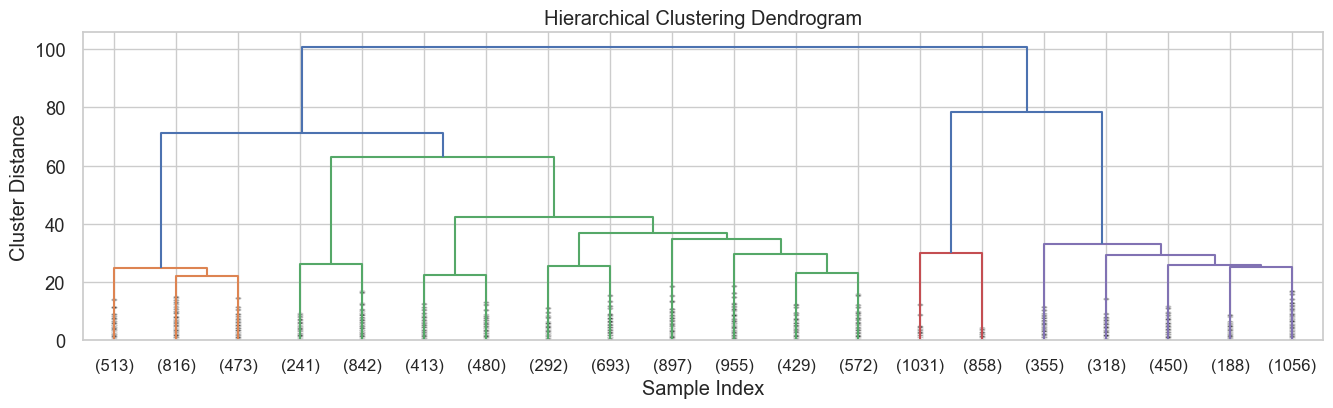

In [31]:
# Replace NaN values with 0 or choose an appropriate imputation method
user_df2.fillna(0, inplace=True)

# Create a dendrogram
fig, ax = plt.subplots(figsize=(16, 4))
dendrogram = hierarchy.dendrogram(
    hierarchy.linkage(user_df2, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Show the plot
plt.show();

If we cut across the largest vertical line, we get two clusters. Next, Create an elbow plot to find the optimal number of clusters

Text(0, 0.5, 'Inertia')

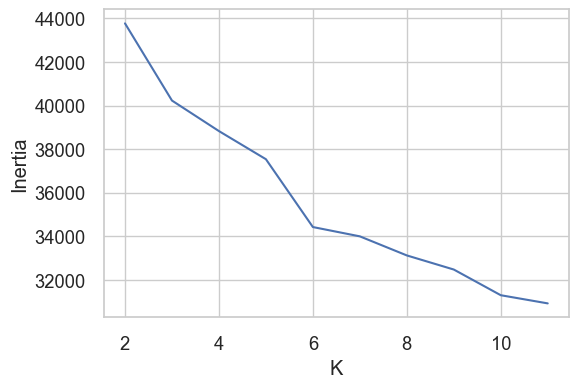

In [32]:
# Initialize an empty list to store inertia values
inertias = []

# Define a range of cluster sizes to try
sizes = range(2, 12)

# Loop through each cluster size
for k in sizes:
    # Initialize KMeans with the specified number of clusters and random state
    k2 = KMeans(random_state=42, n_clusters=k)
    
    # Fit KMeans to the data and compute inertia
    k2.fit(user_df2)
    
    # Append the inertia to the list
    inertias.append(k2.inertia_)

# Create a plot of inertia vs. number of clusters
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)

# Set labels for the plot
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

The inertia plot is pretty smooth but there seems to be a slight elbow around 3.

Plot inertia, the silhouette coefficient, the Calinski-Harabasz Index, and the Davies-Bouldin Index over a range of cluster sizes to see if there is a clear size of clusters for the data

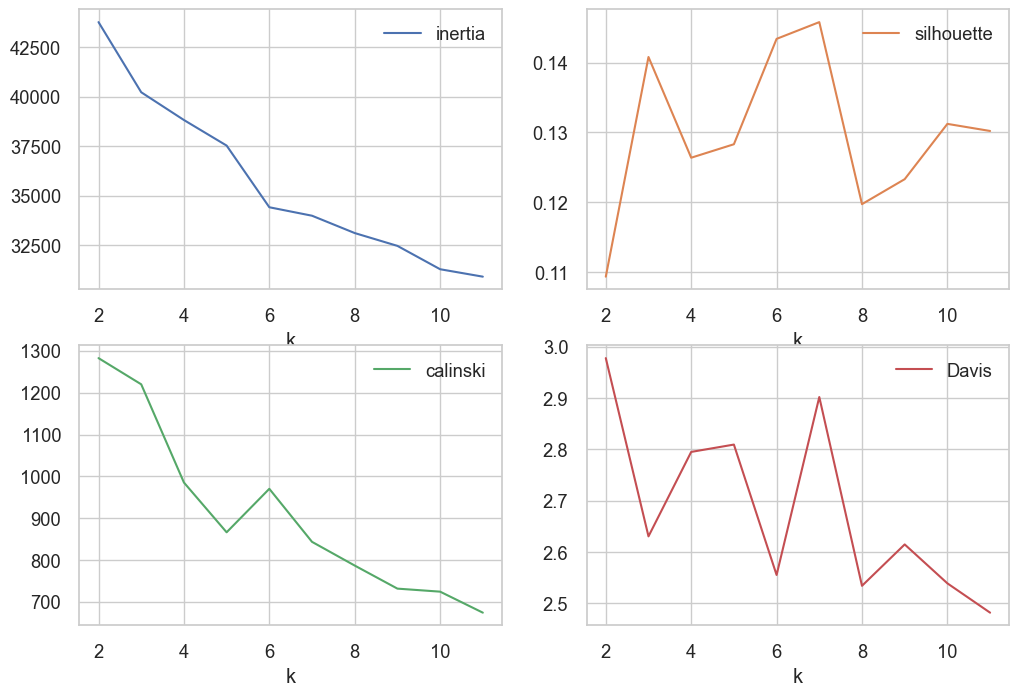

In [33]:
# Initialize empty lists to store evaluation metrics
inertias = []  # Inertia values
sils = []      # Silhouette scores
chs = []       # Calinski-Harabasz scores
dbs = []       # Davies-Bouldin scores

# Define a range of cluster sizes to try
sizes = range(2, 12)

# Loop through each cluster size
for k in sizes:
    # Initialize KMeans with the specified number of clusters and random state
    k2 = KMeans(random_state=42, n_clusters=k)
    
    # Fit KMeans to the data
    k2.fit(user_df2)
    
    # Compute inertia and append to the list
    inertias.append(k2.inertia_)
    
    # Compute silhouette score and append to the list
    sils.append(metrics.silhouette_score(user_df2, k2.labels_))
    
    # Compute Calinski-Harabasz score and append to the list
    chs.append(metrics.calinski_harabasz_score(user_df2, k2.labels_))
    
    # Compute Davies-Bouldin score and append to the list
    dbs.append(metrics.davies_bouldin_score(user_df2, k2.labels_))

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create a DataFrame to hold evaluation metrics for each cluster size
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "Davis": dbs,  # Updated to include Davies-Bouldin scores
            "k": sizes,
        }
    )
    .set_index("k")  # Set the cluster size as the index
    .plot(ax=ax, subplots=True, layout=(2, 2))  # Plot subplots for each metric
);

The inertia plot looks like the elbow is at 3. The silhouette, Calinski, and Davis plots all show a k of 3. Next, use yellowbrick's silhouette plot feature to test several different values of k.

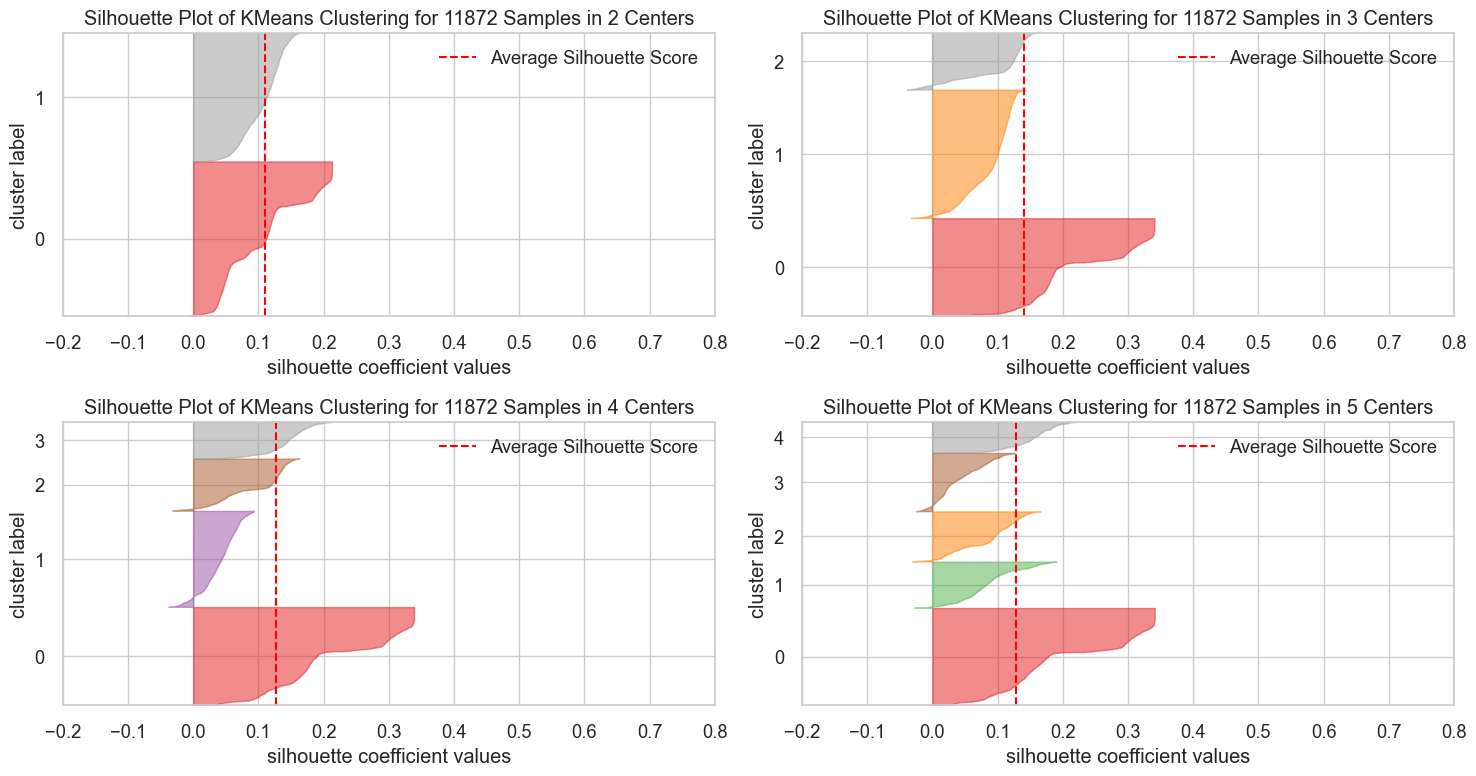

In [34]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Reshape the axes array to a 1D array for easy iteration
axes = axes.reshape(4)

# Loop through cluster sizes from 2 to 5
for i, k in enumerate(range(2, 6)):
    # Get the current axis
    ax = axes[i]
    
    # Initialize SilhouetteVisualizer with KMeans clustering and current axis
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    
    # Fit the visualizer to the data
    sil.fit(user_df2)
    
    # Finalize the visualization
    sil.finalize()
    
    # Set x-axis limits for consistency
    ax.set_xlim(-0.2, 0.8)

# Adjust layout to make sure subplots are properly arranged
plt.tight_layout()


For the silhouette plots, I want to make sure that each cluster bumps out above the average line, and that the cluster scores look decent. We think the first plot with 2 centers is the best plot that fits these criteria. After reviewing multiple plots, we believe that 2 clusters should be imposed on the data.

# Post-Clustering Exploratory Data Analysis

Use the grouping functionality in pandas to examine the differences in the clusters.

In [35]:
# Initialize a KMeans model with 2 clusters
km = KMeans(n_clusters=2)

# Fit the KMeans model to the data
km.fit(user_df2)

# Predict cluster labels for each data point
labels = km.predict(user_df2)

# Set display option to show all rows
pd.set_option('display.max_rows', None) 

# Print the mean and variance of each feature grouped by cluster
print((user_df2.assign(cluster=labels)  # Assign cluster labels to each data point
    .groupby("cluster")  # Group by cluster labels
    .agg(["mean", "var"])  # Compute mean and variance for each group
    .T))  # Transpose the DataFrame for better readability


cluster                                    0         1
Administrative                mean  0.016827  0.018647
                              var   0.000674  0.001125
Administrative_Duration       mean  0.337874  0.356051
                              var   0.181332  0.184960
Informational                 mean  0.002871  0.003275
                              var   0.000107  0.000318
Informational_Duration        mean  0.069564  0.071389
                              var   0.043868  0.045794
ProductRelated                mean  0.512895  0.532150
                              var   0.179679  0.173978
ExitRates                     mean  0.003943  0.003654
                              var   0.000136  0.000108
PageValues                    mean  0.044615  0.047614
                              var   0.024586  0.026282
SpecialDay                    mean  0.002177  0.002189
                              var   0.000204  0.000229
Month_Mar                     mean  0.155856  0.134752
          

It appears that the mean value for OperatingSystems_1, OperatingSystems_2, OperatingSystems_3, OperatingSystems_4, Browser_1, Browser_2, Browser_8 and TrafficType_13 varies quite a bit between cluster 0 and 1. Let's plot this so it'll be easier to see.

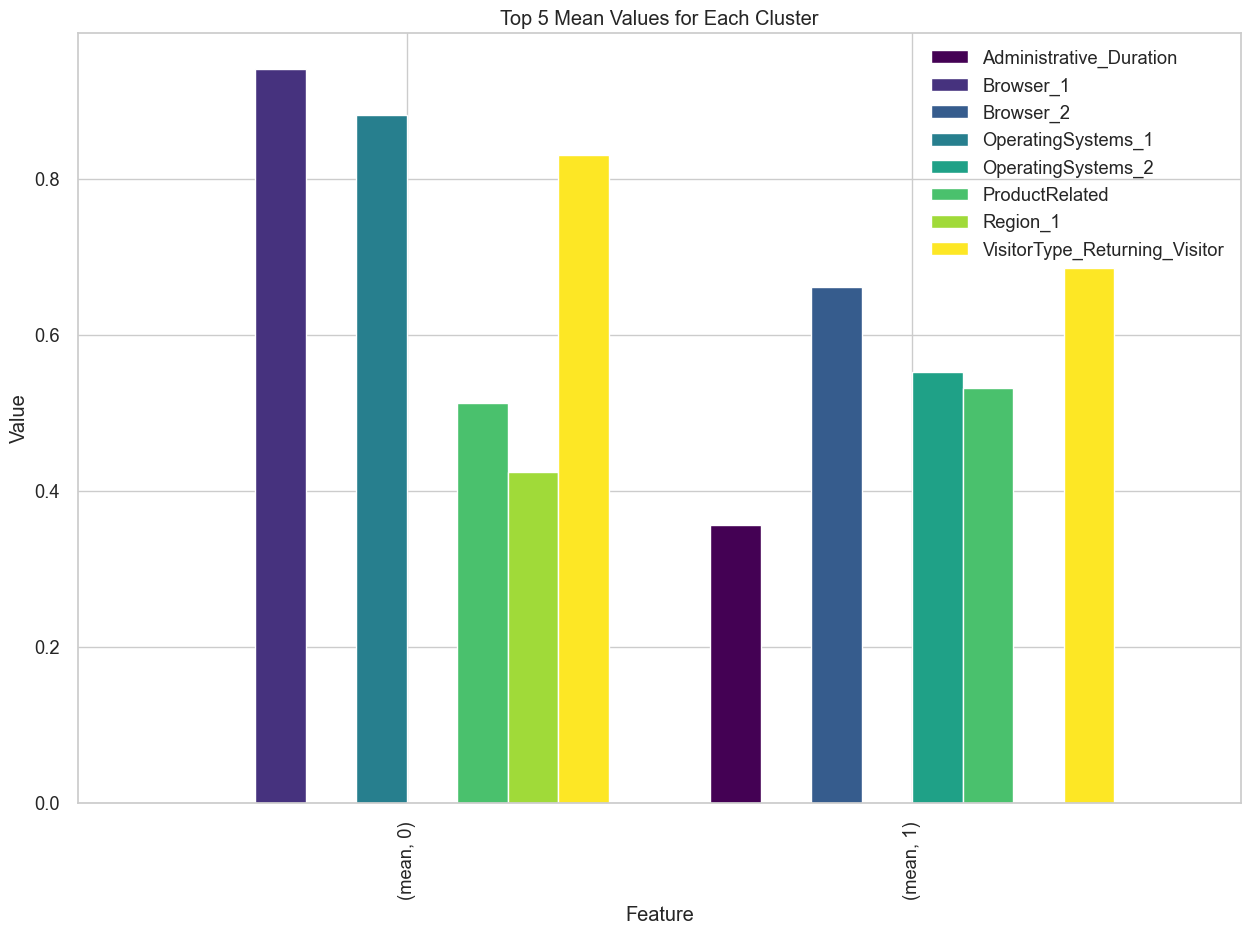

In [58]:
# Calculate mean and variance for each cluster
cluster_stats = user_df2.assign(cluster=labels).groupby("cluster").agg(["mean"]).T

# Select the top 10 mean and variance values
top_10_values = cluster_stats.apply(lambda x: x.nlargest(5)).stack()

# Plot the top 10 mean and variance values
fig, ax = plt.subplots(figsize=(15, 10))
top_10_values.unstack(0).plot(kind='bar', ax=ax, width=0.8, colormap='viridis')

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Top 5 Mean Values for Each Cluster')

# Show the plot
plt.show();

I have shown only 5 clusters mean  because when I tried with show all then its computationally so expensive but I did my own environment. It worked and visualization was not so appealing. 

__Feature Importance__

In [37]:
# Create a Decision Tree classifier and fit it to the data
dt = DecisionTreeClassifier()
dt.fit(user_df2, labels)

# Get feature importances and indices of the top 10 features
importances = dt.feature_importances_
top_indices = importances.argsort()[-10:][::-1]

# Print the top 10 features and their importance scores in descending order
print("Top 10 Features:")
for idx in top_indices:
    print(f"{user_df2.columns[idx]:<15}: {importances[idx]:.1f}");


Top 10 Features:
Browser_1      : 0.9
Browser_8      : 0.1
Browser_2      : 0.0
Region_1       : 0.0
OperatingSystems_1: 0.0
TrafficType_2  : 0.0
Region_7       : 0.0
Weekend        : 0.0
Month_Nov      : 0.0
VisitorType_Returning_Visitor: 0.0


This shows that Browser_1, which also had a large difference in the mean, is very important feature.

# Clustering Output vs. Actual Labels

Let’s set the number of clusters as 2 and fit the model. Then, let’s look at the value count of points in each of the clusters.

In [38]:
# Set the number of clusters
k = 2

# Initialize KMeans with the specified number of clusters and random state
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans to the data and predict cluster labels for each data point
y_pred = kmeans.fit_predict(user_df2)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [39]:
# Create a DataFrame with predicted cluster labels as a single column named 'Revenue'
Revenue = pd.DataFrame(y_pred, columns=['Revenue'])

Add the cluster output "Revenue" column to the data frame

In [40]:
#Concatenate the data frame with the actual classification labels.
user_df3 = pd.concat([user_df2, Revenue], axis=1)

#Check results
user_df3.head()

Administrative  Administrative_Duration  Informational  \
0        0.000000                 0.000000       0.000000   
1        0.000000                 0.000000       0.000000   
2        0.044264                 0.414973       0.022132   
3        0.034226                 0.989993       0.000000   
4        0.014902                 0.894129       0.014902   

   Informational_Duration  ProductRelated  ExitRates  PageValues  SpecialDay  \
0                0.000000        0.147957   0.000528    0.988994         0.0   
1                0.000000        0.999994   0.003401    0.000000         0.0   
2                0.907408        0.044264   0.000194    0.000000         0.0   
3                0.000000        0.136905   0.000103    0.000000         0.0   
4                0.223532        0.387456   0.000057    0.000000         0.0   

   Month_Mar  Month_May  ...  TrafficType_14  TrafficType_15  TrafficType_16  \
0        0.0        1.0  ...             0.0             0.0             0.0   
1        1.0        0.0  ...             0.0             0.0             0.0   
2        0.0        0.0  ...             0.0             0.0             0.0   
3        0.0        0.0  ...             0.0             0.0             0.0   
4        0.0        1.0  ...             0.0             0.0             0.0   

   TrafficType_18  TrafficType_19  TrafficType_20  VisitorType_New_Visitor  \
0             0.0             0.0             0.0                      1.0   
1             0.0             0.0             0.0                      0.0   
2             0.0             0.0             0.0                      1.0   
3             0.0             0.0             0.0                      0.0   
4             0.0             0.0             0.0                      0.0   

   VisitorType_Returning_Visitor  Weekend  Revenue  
0                            0.0      1.0      0.0  
1                            1.0      0.0      1.0  
2                            0.0      0.0      1.0  
3                            1.0      0.0      0.0  
4                            1.0      0.0      1.0  

[5 rows x 67 columns]

__Read the Project2_Data_Labels.csv file from your Github repository and add its content to another new column within your Pandas data frame.__

In [41]:
#Read in the csv from Github
V_Revenue = pd.read_csv("https://raw.githubusercontent.com/mamun21616/DAV-6150/main/Project2_Data_Labels.csv", sep=',')
V_Revenue.rename(
    columns=({ 'Revenue': 'V_Revenue'}), 
    inplace=True,)

__Convert V_Revenue values of True/False to 1/0__

In [42]:
#Change the data type to int
V_Revenue = V_Revenue.astype(int)

#Replace True/False with 1/0
V_Revenue = V_Revenue.replace(to_replace = ['True','False'],value = [1,0])

#View the data frame to ensure the changes were made
V_Revenue.head()

V_Revenue
0          1
1          0
2          0
3          0
4          0

Add V_Revenue to the data frame.

In [43]:
#Concatenate the data frame with the actual classification labels.
user_df4 = pd.concat([user_df3, V_Revenue], axis=1)

#Check results
user_df4.head()

Administrative  Administrative_Duration  Informational  \
0        0.000000                 0.000000       0.000000   
1        0.000000                 0.000000       0.000000   
2        0.044264                 0.414973       0.022132   
3        0.034226                 0.989993       0.000000   
4        0.014902                 0.894129       0.014902   

   Informational_Duration  ProductRelated  ExitRates  PageValues  SpecialDay  \
0                0.000000        0.147957   0.000528    0.988994         0.0   
1                0.000000        0.999994   0.003401    0.000000         0.0   
2                0.907408        0.044264   0.000194    0.000000         0.0   
3                0.000000        0.136905   0.000103    0.000000         0.0   
4                0.223532        0.387456   0.000057    0.000000         0.0   

   Month_Mar  Month_May  ...  TrafficType_15  TrafficType_16  TrafficType_18  \
0        0.0        1.0  ...             0.0             0.0             0.0   
1        1.0        0.0  ...             0.0             0.0             0.0   
2        0.0        0.0  ...             0.0             0.0             0.0   
3        0.0        0.0  ...             0.0             0.0             0.0   
4        0.0        1.0  ...             0.0             0.0             0.0   

   TrafficType_19  TrafficType_20  VisitorType_New_Visitor  \
0             0.0             0.0                      1.0   
1             0.0             0.0                      0.0   
2             0.0             0.0                      1.0   
3             0.0             0.0                      0.0   
4             0.0             0.0                      0.0   

   VisitorType_Returning_Visitor  Weekend  Revenue  V_Revenue  
0                            0.0      1.0      0.0          1  
1                            1.0      0.0      1.0          0  
2                            0.0      0.0      1.0          0  
3                            1.0      0.0      0.0          0  
4                            1.0      0.0      1.0          0  

[5 rows x 68 columns]

__Calculate some basic comparative statistics between the two columns to demonstrate their similarities and differences.__

In [44]:
# Count the occurrences of each unique value in the 'Revenue' column of user_df4
# and display the counts in descending order
user_df4.Revenue.value_counts()

0.0    6483
1.0    5389
Name: Revenue, dtype: int64

There are 6483 data points belonging to cluster 0 and 5389 data points belonging to cluster 1. They are very close to each other, not large imbalance.

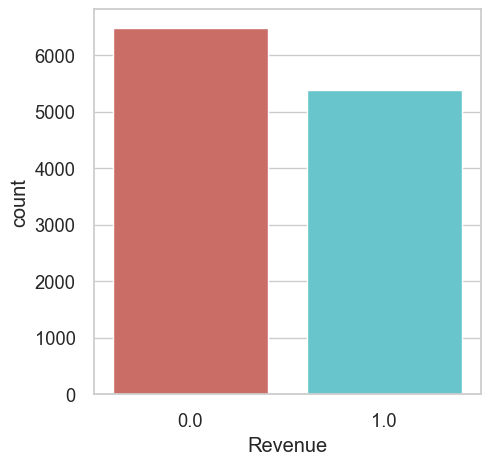

In [45]:
# Set the figure size for the plot
plt.figure(figsize=(5,5))

# Create a count plot of the 'Revenue' column from user_df4
sns.countplot(x='Revenue', data=user_df4, palette='hls')

# Display the plot
plt.show();

In [46]:
# Calculate the imbalance of Revenue

# Count the number of instances where 'Revenue' is 0 (no purchase)
count_no_purch = len(user_df4[user_df4['Revenue']==0])

# Count the number of instances where 'Revenue' is 1 (made a purchase)
count_purch = len(user_df4[user_df4['Revenue']==1])

# Calculate the percentage of instances with no purchase
pct_of_no_purch = count_no_purch / (count_no_purch + count_purch)

# Print the percentage of instances with no purchase
print("% of no purchase is", round(pct_of_no_purch * 100))

# Calculate the percentage of instances with a purchase
pct_of_purch = count_purch / (count_no_purch + count_purch)

# Print the percentage of instances with a purchase
print("% of made a purchase is", round(pct_of_purch * 100))


% of no purchase is 55
% of made a purchase is 45


We see that the clusters for Revenue predicted that 55% of website visitors did not make a purchase and 45% of website visitors did make a purchase.

In [47]:
# Count the occurrences of each unique value in the 'Revenue' column of user_df4
# and display the counts in descending order
user_df4.V_Revenue.value_counts()

0    10422
1     1908
Name: V_Revenue, dtype: int64

The class labels showed that 10,422 visitors did not make a purchase and 1,908 visitors did make a purchase.

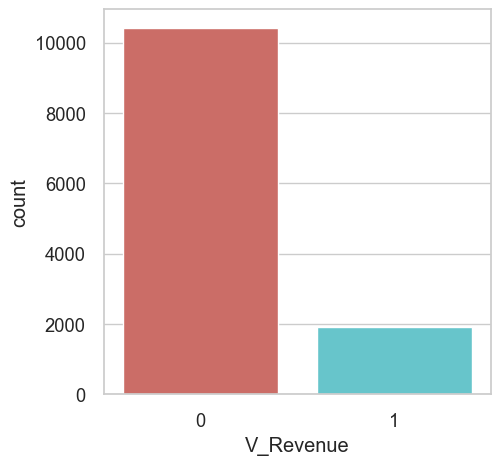

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(x='V_Revenue', data=user_df4, palette='hls')
plt.show();

In [49]:
# Calculate the imbalance of V_Revenue

# Count the number of instances where 'V_Revenue' is 0 (no purchase)
count_no_purch2 = len(user_df4[user_df4['V_Revenue']==0])

# Count the number of instances where 'V_Revenue' is 1 (made a purchase)
count_purch2 = len(user_df4[user_df4['V_Revenue']==1])

# Calculate the percentage of instances with no purchase
pct_of_no_purch2 = count_no_purch2 / (count_no_purch2 + count_purch2)

# Print the percentage of instances with no purchase
print("% of no purchase is", round(pct_of_no_purch2 * 100))

# Calculate the percentage of instances with a purchase
pct_of_purch2 = count_purch2 / (count_no_purch2 + count_purch2)

# Print the percentage of instances with a purchase
print("% of made a purchase is", round(pct_of_purch2 * 100))


% of no purchase is 85
% of made a purchase is 15


The class labels for V_Revenue show that 85% of website visitors did not make a purchase and 15% of website visitors did make a purchase.

__Find the differences between Revenue and V_Revenue.__

In [50]:
# Drop rows with NaN values in 'Revenue'
user_df4 = user_df4.dropna(subset=['Revenue'])

# Now, you can perform classification evaluation
print(classification_report(user_df4['V_Revenue'], user_df4['Revenue']))
print(confusion_matrix(user_df4['V_Revenue'], user_df4['Revenue']))

p = precision_score(user_df4['V_Revenue'], user_df4['Revenue'])
f = f1_score(user_df4['V_Revenue'], user_df4['Revenue'])
a = accuracy_score(user_df4['V_Revenue'], user_df4['Revenue'])

print("Precision:", p)
print("F1 score:", f) 
print("Accuracy:", a)


              precision    recall  f1-score   support

           0       0.85      0.55      0.66     10043
           1       0.16      0.46      0.23      1829

    accuracy                           0.53     11872
   macro avg       0.50      0.50      0.45     11872
weighted avg       0.74      0.53      0.60     11872

[[5492 4551]
 [ 991  838]]
Precision: 0.1555019484134348
F1 score: 0.23219728456636188
Accuracy: 0.5331873315363881


Precision for class 0 (those not predicted as revenue) is 0.85, indicating that out of all the instances predicted as not revenue, 85% of them are correctly classified.

Precision for class 1 (those predicted as revenue) is 0.16, indicating that out of all the instances predicted as revenue, only 16% of them are correctly classified.

Recall for class 0 is 0.55, meaning that out of all the actual instances that are not revenue, 55% of them are correctly classified.

Recall for class 1 is 0.46, meaning that out of all the actual instances that are revenue, 46% of them are correctly classified.

The F1-score is the harmonic mean of precision and recall. For class 0, it's 0.66, and for class 1, it's 0.23.

The overall accuracy of the model is 0.53, meaning that 53% of all instances are correctly classified.

__Display the difference in cluster assigned Revenue class and Actual class Revenue__

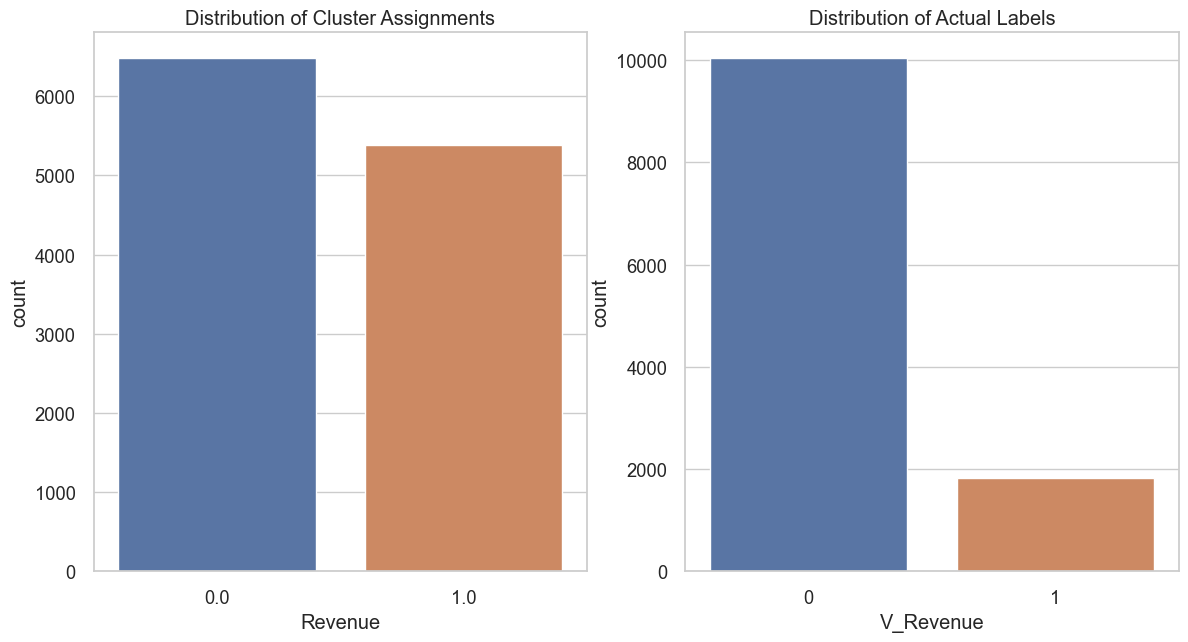

In [51]:
plt.figure(figsize=(14, 7))

# Distribution of Cluster (Revenue)
plt.subplot(1, 2, 1)
sns.countplot(x='Revenue', data=user_df4)
plt.title('Distribution of Cluster Assignments')

# Distribution of Actual Labels
plt.subplot(1, 2, 2)
sns.countplot(x='V_Revenue', data=user_df4)
plt.title('Distribution of Actual Labels')

plt.show()

# SVM Modeling

In [52]:
# Select features (Xs) and target variable (ys)
Xs = user_df4.iloc[:, 0:66]  # Features
ys = user_df4.Revenue  # Target variable

# Prepare data for classification process
# Split the data into training and testing sets
# Use 20% of the data for testing (test_size=0.20)
# Use random state number 42 to ensure reproducibility of results
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.20, random_state=42)


In [53]:
# Instantiate an imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
Xs_train_imputed = imputer.fit_transform(Xs_train)

# Instantiate and train the SVC classifier
svm = SVC(random_state=42, kernel="linear", C=1)
svm.fit(Xs_train_imputed, ys_train)

# Calculate accuracy on the training data
predictions_train = svm.predict(Xs_train_imputed)
accuracy = accuracy_score(ys_train, predictions_train)
print("Accuracy:", accuracy)


Accuracy: 0.9194482468147837


According to Machine Learning Pocket Reference Chapter 10, C is the penalty parameter. The smaller the value, the tighter the decision boundary (more overfitting). If we can overfit with a linear model, that means the data is linearly separable. For SVM with a linear kernel where C=1, we got an accuracy rate of 91%. We expect to get an accuracy rate of 100% if our data is linearly separable so we conclude that the linear kernel is the best method for our SVM models

__Construct at least two different SVM models using different explanatory variables__

In [54]:
# Define predictors for SVM1 and SVM2
predictors_svm1 = ['Browser_1', 'Browser_8', 'OperatingSystems_2']
predictors_svm2 = ['Browser_2', 'OperatingSystems_1', 'OperatingSystems_3']

# Response and explanatory variables for SVM1
X1 = user_df4[predictors_svm1]
y1 = user_df4.Revenue

# Response and explanatory variables for SVM2
X2 = user_df4[predictors_svm2]
y2 = user_df4.Revenue


# Prepare data for classification process for SVM1, use random state of 42
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

# Prepare data for classification process for SVM2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)


# Instantiate an imputer to replace NaN values with the mean of the column for SVM1
imputer = SimpleImputer(strategy='mean')
X1_train_imputed = imputer.fit_transform(X1_train)

# Instantiate an imputer to replace NaN values with the mean of the column for SVM2
X2_train_imputed = imputer.fit_transform(X2_train)

# Instantiate and train SVM1 classifier
svm1 = SVC(random_state=42, C=1, kernel="linear")
svm1.fit(X1_train_imputed, y1_train)

# Instantiate and train SVM2 classifier
svm2 = SVC(random_state=42, C=1, kernel="linear")
svm2.fit(X2_train_imputed, y2_train)


SVC(C=1, kernel='linear', random_state=42)

# Model Selection

In [55]:
# Predictions for SVM1
y1_train_pred = svm1.predict(X1_train_imputed)

# Predictions for SVM2
y2_train_pred = svm2.predict(X2_train_imputed)

# Metrics for SVM1
svm1_metrics = {
    "Model": "SVM1",
    "CV Mean Score": cross_val_score(svm1, X1_train_imputed, y1_train, scoring='accuracy', cv=10).mean(),
    "Precision": precision_score(y1_train, y1_train_pred),
    "F1 Score": f1_score(y1_train, y1_train_pred),
    "Accuracy": accuracy_score(y1_train, y1_train_pred)
}

# Metrics for SVM2
svm2_metrics = {
    "Model": "SVM2",
    "CV Mean Score": cross_val_score(svm2, X2_train_imputed, y2_train, scoring='accuracy', cv=10).mean(),
    "Precision": precision_score(y2_train, y2_train_pred),
    "F1 Score": f1_score(y2_train, y2_train_pred),
    "Accuracy": accuracy_score(y2_train, y2_train_pred)
}

# Create DataFrame for comparison
comparison_df = pd.DataFrame([svm1_metrics, svm2_metrics])

# Print the DataFrame
comparison_df


Model  CV Mean Score  Precision  F1 Score  Accuracy
0  SVM1       0.919445   0.923950  0.909134  0.919448
1  SVM2       0.815623   0.887423  0.767679  0.815626

Based on the comparison of our training metrics, our selected model will be our SVM 1 model. It has three variables, and the highest precision, F1 score, and accuracy sore. The cross-validation score was also 91.9%. Therefore, we are favoring the SVM 1 model. While the SVM 2 model also performed well, precision was 88.7% and the F1 score was 77%. 

Given the superior performance of SVM1 in terms of CV Mean Score, precision, F1 score, and accuracy, it may be the preferred model for predicting the value of the Revenue classification.

However, consider other factors such as model interpretability, complexity, and practical constraints when making the final decision. If SVM2 offers significant advantages in these areas despite slightly lower performance, it might still be a viable choice.

# Clustering + SVM Output vs. Actual Labels

Accuracy: 0.8193684210526315
Precision: 0.895712630359212
Recall: 0.6951438848920863
F1 Score: 0.7827848101265823


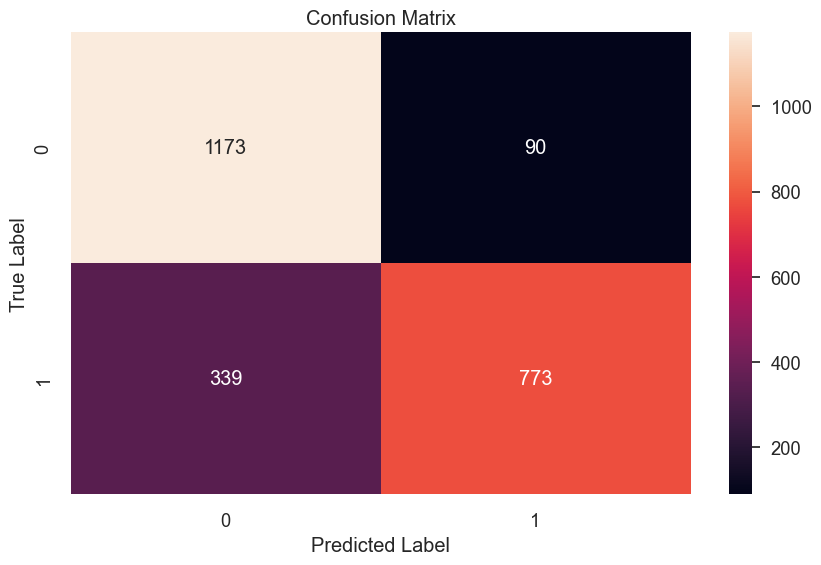

In [56]:
# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X2_train)

# Transform the testing data using the trained imputer
X_test_imputed = imputer.transform(X2_test)

# Train the SVC model using the imputed training data
svm2.fit(X_train_imputed, y2_train)

# Predict Revenue using the SVM model on the testing dataset
y_pred_test = svm2.predict(X_test_imputed)

# Compare predicted Revenue with actual V_Revenue
comparison_df = pd.DataFrame({
    'Actual_V_Revenue': y2_test,
    'Predicted_Revenue': y_pred_test
})

# Calculate assessment metrics (e.g., accuracy)
accuracy = accuracy_score(y2_test, y_pred_test)
precision = precision_score(y2_test, y_pred_test)
recall = recall_score(y2_test, y_pred_test)
f1 = f1_score(y2_test, y_pred_test)

# Print assessment metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize the comparison if needed (e.g., confusion matrix)
conf_matrix = confusion_matrix(y2_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show();


The model achieves relatively high precision, indicating that when it predicts a customer to generate revenue, it is correct most of the time.
The recall is slightly lower compared to precision, suggesting that the model may miss some revenue-generating customers.
The F1 score balances both precision and recall, providing a comprehensive measure of the model's performance.
Overall, the model shows promising results with respectable accuracy, precision, recall, and F1 score, but there may still be room for improvement, especially in terms of recall to capture more revenue-generating customers.

# Conclusion

Hierarchical clustering revealed potential natural groupings within the data, as indicated by the dendrogram. The performance of SVM models was evaluated using cross-validation techniques, and the best-performing model was selected based on predefined criteria.The performance of the SVM model derived from clustering results was assessed to determine how well it matched up to the actual classifications. The clustering analysis and predictive modeling provided insights into factors influencing revenue generation or purchase behavior of website visitors.

Understanding these factors can help in devising targeted marketing strategies, improving website design, or enhancing user experience to maximize revenue. It's essential to acknowledge any limitations encountered during the project, such as data quality issues, model assumptions, or simplifications made during analysis.

Suggestions for future work could include refining models, incorporating additional features, exploring different algorithms, or conducting more extensive experimentation to improve predictive performance.

In summary, our model needs improvement, particularly in its ability to predict positive cases (Revenue). This could involve exploring different features, algorithms, or techniques to address class imbalance issues and improve overall predictive performance. Additionally, it's crucial to consider the practical implications of false positives and false negatives in your specific application domain.

And finally, yes I will say we can predict purchasing from website with clustering which is Unsupervised modeling technique.

# Reference


In this project, I have used some helpful resources that guided data analysis and model-building process. 

1. Our data came from a Kaggle dataset, You can find this dataset at Kaggle: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

2. Traffic types: https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics

3. Dummy variable encoding : https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

4. Linear separability: https://maurygreen.medium.com/how-to-check-for-linear-separability-13c177ae5a6e
5. Video link source: https://www.youtube.com/watch?v=TlGpIKMVoOg (around minute 17)